In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce
%matplotlib inline
import seaborn as sns
sns.set() 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MaxAbsScaler
from sklearn.metrics import accuracy_score
from sklearn.utils.extmath import softmax
from catboost import CatBoostClassifier

train = pd.read_csv('prepared.csv')

# Feature importance by Logistic Regression

In [2]:
def feature_importances(df):
        
    X = df.drop('Transported', axis=1)
    y = df[['Transported']]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
    
    # Logistic Regression    
    clf_lr = LogisticRegression(random_state = 0)
    clf_lr.fit(X_train, y_train)
    coef_lr = clf_lr.coef_[0]
    
    acc_train_lr = accuracy_score(y_true=y_train, y_pred=clf_lr.predict(X_train))
    acc_test_lr = accuracy_score(y_true=y_test, y_pred=clf_lr.predict(X_test))
    label_lr = f'Importance (LR abs), acc_train = {acc_train_lr:.2%}, acc_test = {acc_test_lr:.2%}'
    
    
    # Random Forest
    clf_rf = RandomForestClassifier(random_state = 0)
    clf_rf.fit(X_train, y_train)
    coef_rf = clf_rf.feature_importances_
    
    acc_train_rf = accuracy_score(y_true=y_train, y_pred=clf_rf.predict(X_train))
    acc_test_rf = accuracy_score(y_true=y_test, y_pred=clf_rf.predict(X_test))
    label_rf = f'Importance (LR abs), acc_train = {acc_train_rf:.2%}, acc_test = {acc_test_rf:.2%}'
    
    # CatBoost
    clf_cat = CatBoostClassifier(random_state = 0)
    clf_cat.fit(X_train, y_train, silent = True)
    coef_cat = clf_cat.feature_importances_
    
    acc_train_cat = accuracy_score(y_true=y_train, y_pred=clf_cat.predict(X_train).astype(bool))
    acc_test_cat = accuracy_score(y_true=y_test, y_pred=clf_cat.predict(X_test).astype(bool))
    label_cat = f'Importance (LR abs), acc_train = {acc_train_cat:.2%}, acc_test = {acc_test_cat:.2%}'

    print(acc_train_lr, acc_train_rf, acc_train_cat)
    print(acc_test_lr, acc_test_rf, acc_test_cat)
    
    feauture_importances = pd.DataFrame({
        'Feature': X.columns,
        'LR': np.abs(coef_lr),
        'RF': coef_rf,
        'CatBoost': coef_cat
    })
    
    feauture_importances = feauture_importances.sort_values(by = 'CatBoost', ascending=False)
    
    sc = MaxAbsScaler()
    feauture_importances[['LR', 'RF', 'CatBoost']] = sc.fit_transform(feauture_importances[['LR', 'RF', 'CatBoost']])
    
    # Plot everything
    
    feauture_importances.plot(kind='bar', x='Feature')
    
#     ax = plt.bar(x=feauture_importances['Feature'], height=feauture_importances['Importance (LR abs)'], label = label_lr)
#     plt.bar(x=feauture_importances['Feature'], height=feauture_importances['Importance (RF)'], label = label_rf, axes=ax)
#     plt.bar(x=feauture_importances['Feature'], height=feauture_importances['Importance (Cat)'], label = label_cat, axes=ax)
#     plt.show()
    

/home/neechan/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/neechan/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/neechan/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sampl

0.778340236232551 0.9998466022396073 0.503298051848443
0.7746090156393745 0.7953081876724931 0.5045998160073597


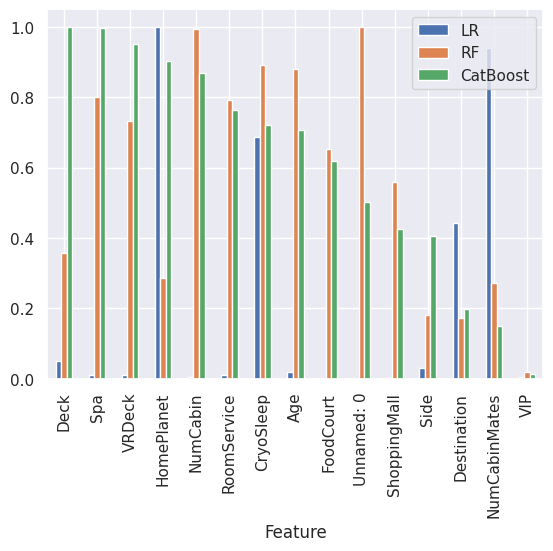

In [3]:
feature_importances(train)

<Axes: >

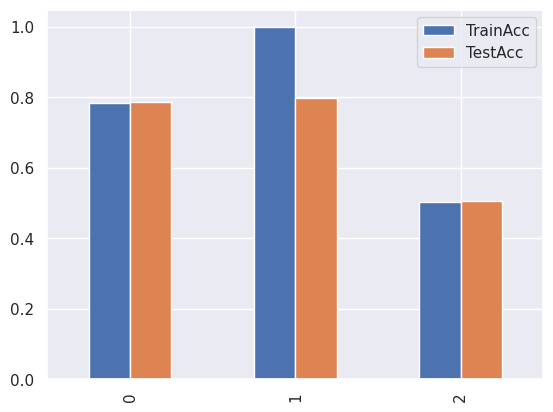

In [4]:
d = {
    'TrainAcc': [0.7850897376898297, 0.9993864089584292, 0.503298051848443],
    'TestAcc': [0.7865685372585096, 0.7989880404783809, 0.5045998160073597]
}
df_acc = pd.DataFrame(data=d)
df_acc.plot.bar()